In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [27]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
X = np.array(X)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=21)

# 【問題1】ジニ不純度を求める関数

${I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}}$

In [29]:
def jini_value(self, y0_len, y1_len, y): #ジニ係数  
    return 1 - ((y0_len / y)**2 + (y1_len / y)**2)

# 【問題2】情報利得を求める関数

${IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)}$

In [30]:
def ig(self, pairent_jini,left_jini,right_jini,left_len,right_len,y): #情報利得
        return pairent_jini - (left_jini * left_len / len(y) + right_jini * right_len / len(y))

# 【問題3】深さ1の決定木分類器クラスの作成

In [36]:
class ScratchDecesionTreeClassifier():
    """
    決定木のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数　今回は分割する回数　今回は1回
    
    max_depth : int
    　　分割した木の深さ　今回は１

    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.verbose = verbose
        # 損失を記録する配列を用意
        

    def fit(self, X, y):
        """
        決定木のフィッティングをする

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.X = X
        #self.X_val = X_val
        #self.y_val = y_val
        self.classification_s = None
        self.classification_b = None
        self.y = y
        self.split_f = None
        self.y_smaller_0 = []
        self.y_smaller_1 = []
        self.y_bigger_0 = []
        self.y_bigger_1 = []
        self.temp_info = ()
        self.temp_max = 0
        self.root_jini = 0
        self.info_all = ()
        temp_max = 0
        for j in range(X.shape[1]):
            for i in range(X.shape[0]):
                info_all,best_sample_feature = self.split_y(i, j)
                if self.temp_max < info_all[0]:
                    self.temp_max = info_all[0]
                    self.info_all_object = info_all
                if bool(best_sample_feature):
                    print(best_sample_feature)
                    break
            else:
                continue
            break

            
    def ig(self, pairent_jini,left_jini,right_jini,left_len,right_len,y): #情報利得
        return pairent_jini - (left_jini * left_len / len(y) + right_jini * right_len / len(y))

    def classification(self, smaller, bigger): #決定木の多数決でsma0ller, biggerの0,1分類
        self.y_smaller_0 = []
        self.y_smaller_1 = []
        self.y_bigger_0 = []
        self.y_bigger_1 = []

        for i in smaller[0]:
            if i is not None:
                if self.y[i]== 1:
                    self.y_smaller_1.append(i) #選択値より小さい値のインデックスでyが１のもの
                elif self.y[i] == 0:
                    self.y_smaller_0.append(i) #選択値より小さい値のインデックスでyが0のもの


        for i in bigger[0]:
            if i is not None:
                if self.y[i] == 1:
                    self.y_bigger_1.append(i) #選択値より大きい値のインデックスでyが１のもの
                elif self.y[i] == 0:
                    self.y_bigger_0.append(i) #選択値より大きい値のインデックスでyが0のもの
        
        if len(self.y_smaller_0) > len(self.y_smaller_1):#smaller木の多数決
            self.classification_s = 0
        else:
            self.classification_s = 1
        
        if len(self.y_bigger_0) > len(self.y_bigger_1):#bigger木の多数決
            self.classification_b = 0
        else:
            self.classification_b = 1
            
            
    def split_y(self,select_split_node,feature_n):
        y1_len = len(np.where(self.y==1)[0]) #Yが１の物の個数を出す
        y0_len = len(np.where(self.y==0)[0]) #Yが0の物の個数を出す
        y_len = len(self.y)
        
        self.root_jini = self.jini_value(y0_len, y1_len, y_len) #一番上の木のジニ係数
        self.split_f = self.X[select_split_node,feature_n]

        smaller = np.where(self.X[:100,feature_n]< self.split_f)#選択値より小さい値のインデックス

        bigger = np.where(self.X[:100,feature_n] >= self.split_f)#選択値より大きい値のインデックス
        smaller_len = len(smaller[0]) #選択値より小さい値の数

        bigger_len = len(bigger[0]) #選択値より大きい値の数

        self.classification(smaller, bigger)

        best_sample_feature ={}
        if smaller_len == 0 or bigger_len ==0:
            info_gain =0
            self.info_all = (info_gain, self.split_f, self.classification_b, self.classification_s)
            return self.info_all,best_sample_feature #サンプルに偏りがあり最初からからだった場合info_allに0,best_sample_featureに空を入れて返す。

        smaller_jini = self. jini_value(len(self.y_smaller_0), len(self.y_smaller_1), smaller_len) #左のジニ係数
        bigger_jini = self. jini_value(len(self.y_bigger_0), len(self.y_bigger_1), bigger_len) #右のジニ係数

        best_sample_feature ={} #全部分け切れてジニ係数が０の時最もスコアの良いXのサンプル番号、と列番目を格納する
        if smaller_jini == 0 and bigger_jini == 0: #ジニ係数がゼロの時つまり分け切った時best_sample_featureにターゲットのサンプル行目と列目を表示する
            best_sample_feature["sample"] = select_split_node
            best_sample_feature["feature"] = feature_n
            root_ig = self.ig(self.root_jini,smaller_jini,bigger_jini, smaller_len, bigger_len,self.y)
            self. info_all = (root_ig, self.split_f, self.classification_b, self.classification_s)
            return self.info_all,best_sample_feature #ジニ係数が０になったときだけbest_sample_featureは値が入る
        
        
        root_ig = self.ig(self.root_jini,smaller_jini,bigger_jini, smaller_len, bigger_len,self.y)
        self.info_all = (root_ig, self.split_f, self.classification_b, self.classification_s)
        return self.info_all,best_sample_feature #split_yの判別のループが終わった時点でinfo_allには最大利得が入り、best_sample_featureは空
    
    def jini_value(self, y0_len, y1_len, y): #ジニ係数
        return 1 - ((y0_len / y)**2 + (y1_len / y)**2) 
       

    def predict(self, X_val):
        """
        決定木を使い推定する。

        Parameters
        ----------
        X_val : 次の形のndarray, shape (n_samples, n_features)
            予測するために使うX

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            決定木の予測値
        """ 

        predict_y =[]
        [predict_y.append(self.info_all_object[2]) if i > self.info_all_object[1] else  predict_y.append(self.info_all_object[3]) for i in X_val[:,1]]

        return predict_y
    
    def decision_region(self, X_train, y_train, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['target1', 'target2']):
        """
        2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
        背景の色が学習したモデルによる推定値から描画される。
        散布図の点は学習用データである。

        Parameters
        ----------------
        X_train : ndarray, shape(n_samples, 2)
            学習用データの特徴量
        y_train : ndarray, shape(n_samples,)
            学習用データの正解値
        step : float, (default : 0.1)
            推定値を計算する間隔を設定する
        title : str
            グラフのタイトルの文章を与える
        xlabel, ylabel : str
            軸ラベルの文章を与える
        target_names= : list of str
            凡例の一覧を与える
        """
        # setting
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2

        # pred
        mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
        mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
        zzz = np.array(self.predict(mesh))
        pred = zzz.reshape(mesh_f0.shape)
        
        # plot
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
        plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
        for i, target in enumerate(set(y_train)):
            plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
        
        
        plt.legend(handles=patches)
        plt.legend()

        plt.show()

    

In [37]:
sdc =ScratchDecesionTreeClassifier(10, True)
sdc.fit(X_train,y_train)

In [38]:
sdc.info_all_object[0] #ループが終わった時点での最大利得

0.11002604166666669

# 問題6】指標値の算出

In [39]:
precision_score(sdc.predict(X_test),y_test)

0.6666666666666666

# 【問題7】決定領域の可視化

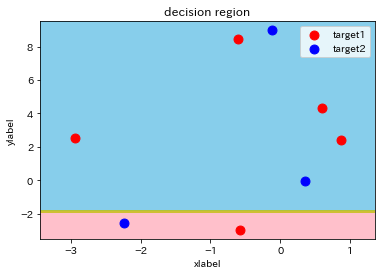

In [41]:
sdc.decision_region(X_test ,y_test)